In [24]:
from fipy import Variable, FaceVariable, CellVariable, Grid1D, \
NthOrderBoundaryCondition, ExplicitDiffusionTerm, TransientTerm, DiffusionTerm, Viewer,PowerLawConvectionTerm,ImplicitSourceTerm
from fipy.tools import numerix
from fipy import DefaultSolver
import numpy as np
import math

import numpy as np
import matplotlib.pyplot as plt
import torch
import math

In [25]:
def solution(x, t, m, C):
    alpha = 1.0 / (m + 1)
    factor = t**(-alpha)
    inner = C + 1 / (2 * m * (m + 1)) * x**2 / (t**(2 * alpha))
    return factor * np.maximum(inner, 0)**(1.0 / (m - 1))

In [26]:
def ic_func(x):
                  
    return solution(x, t0, m, C) # analytic Barenblatt at t0

In [27]:
L = 15.
T = 1.
nx = 2000

dx = 2*L/nx
dt = 0.5*dx**2
mesh = Grid1D(nx=nx, dx=dx) - [[L]]
C = 1
m = 0.5
t0 = 0.001
valueLeft = 0
valueRight = 0
timeStepDuration = dt
steps = int(T/dt)+1

In [28]:
x = mesh.cellCenters[0]
IC = ic_func(x)
phi = CellVariable(name="solution variable",
                   mesh=mesh,
                   value=IC,
                   hasOld = True)


phi.constrain(valueLeft,where=mesh.facesLeft)
phi.constrain(valueRight, where= mesh.facesRight)


eqX = (TransientTerm(coeff = 1)
      == DiffusionTerm(coeff = m*phi**(m-1)) )




from builtins import range
solver = DefaultSolver()


In [29]:
U_fem = []
U_exact = []

for step in range(steps):
   
    
    
    U_fem.append(np.array(phi))
    
    npx = torch.from_numpy(np.array(x))
    
    U_exact.append(solution(npx,t0+timeStepDuration*step,m,C))
    phi.updateOld()
    eqX.solve(var=phi,
              dt=timeStepDuration,
              #boundaryConditions = BCs,
              solver = solver)

/tmp/ipykernel_4242/2735911291.py:5: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return factor * np.maximum(inner, 0)**(1.0 / (m - 1))


In [30]:
U_exact = np.array(U_exact)
U_fem = np.array(U_fem)

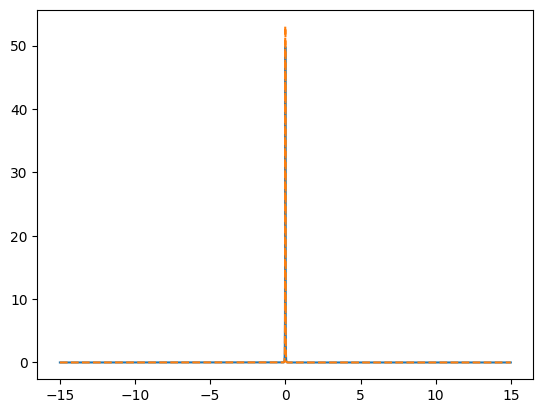

In [31]:
plt.plot(np.array(x), U_fem[1])
plt.plot(np.array(x), U_exact[1], linestyle = '--')

0.013585060786050453
12.395305781646503



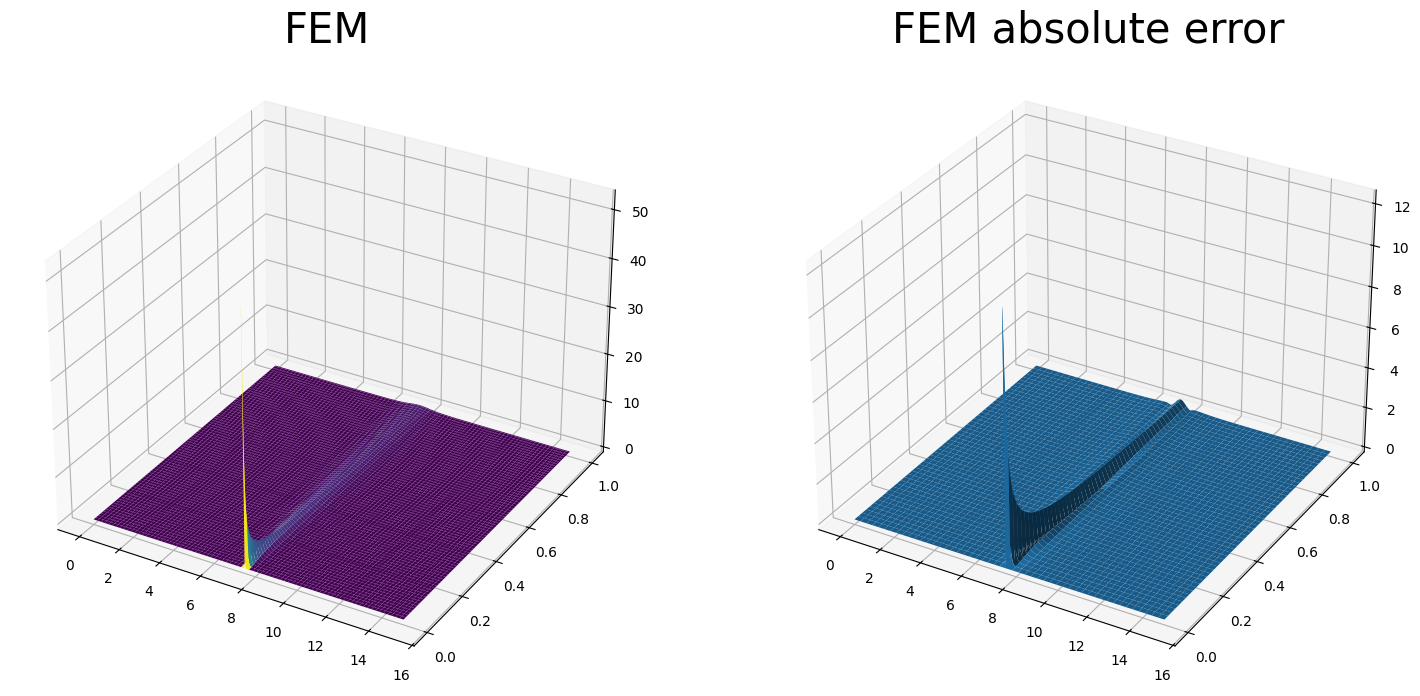

In [32]:
import matplotlib.pyplot as plt
Ts = np.linspace(0,T,steps)
Xs = np.linspace(0,L,nx)
XX,TT = np.meshgrid(Xs,Ts)
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(1,2,1, projection = '3d')

ax.plot_surface(XX,TT,U_fem,rcount=80, ccount=80, cmap="viridis", edgecolor="none")
ax.set_title('FEM', fontsize = 30)
ax = fig.add_subplot(1,2,2, projection = '3d')

ax.set_title('FEM absolute error', fontsize = 30)
ax.plot_surface(XX,TT,np.abs(U_fem - U_exact))
print(np.mean(np.mean((U_fem - U_exact)**2)))
print(np.max(np.abs(U_fem - U_exact)))
print()